<a href="https://colab.research.google.com/github/geun-hyoung/python-exploratory-data-analysis-police-data/blob/main/Data_Clenaing%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Cleaning



In [ ]:
# google drive
from google.colab import drive
drive.mount('/content/drive') # Connect to drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium import plugins
from folium.features import DivIcon

import json
import requests

In [ ]:
# 112 factor = 112 신고 접수량의 융합 요소 데이터
fusion_element = pd.concat([
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/112factor_19.csv', encoding = 'cp949'),
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/112factor_20.csv', encoding = 'cp949'),
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/112factor_21.csv', encoding = 'cp949')], axis = 0)

# korean_112 = 112신고접수량 데이터
report_data = pd.concat([
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/Korea_112_19.csv', encoding = 'cp949'),
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/Korea_112_20.csv', encoding = 'cp949'),
    pd.read_csv('/content/drive/MyDrive/데이터마이닝/Korea_112_21.csv', encoding = 'cp949')], axis = 0)

print("융합 요소 데이터 갯수:", fusion_element.shape)
print("신고 데이터 갯수:", report_data.shape)

융합 요소 데이터 갯수: (9934, 28)
신고 데이터 갯수: (9946, 43)


In [ ]:
# 두 데이터셋이 공통 값인데도 불구하고 맞지 않은 경우가 있어, 신고접수량 데이터를 기준으로 통일
fusion_element.drop(labels =['RPRT_CASCNT_WHOL', 'RPRT_SEX_MALE',
       'RPRT_SEX_FMLE', 'RPRT_SEX_UNKWN', 'RPRT_SEX_ETC',
       'ACPT_EMERG_TYPE_EMERG', 'ACPT_EMERG_TYPE_IMPRTNC',
       'ACPT_EMERG_TYPE_GNRL', 'ACPT_EMERG_TYPE_CVAPP', 'ACPT_EMERG_TYPE_ETC',
       'OCRN_DOTW_SNDD', 'OCRN_DOTW_MON', 'OCRN_DOTW_TUE', 'OCRN_DOTW_WED',
       'OCRN_DOTW_THU', 'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT', 'MNTH_AVE_INCOME_AMT',
       'TOTL_RESID_PUL_CNT'], axis = 1, inplace = True)

In [ ]:
# 신고 접수량 데이터셋에는 고성이 X
fusion_element.drop(index = fusion_element[fusion_element['PLCST_NM'] == '고성'].index, axis = 0, inplace = True)

In [ ]:
# 112 융합 요소 데이터와 + 112 신고 접수 데이터 결합
df = pd.merge(report_data, fusion_element, how = 'left', on = ("ACPT_YM", "PLCST_NM"))

In [ ]:
# 결측치 제거
df.dropna(axis=0,inplace = True)

In [ ]:
# 전체 데이터 셋
df.shape

(9898, 50)

In [ ]:
# Time 형식으로 변환 과정
def change_dt(values):
    return str(values)[0:4] + '-' + str(values)[4:]

df['ACPT_YM'] = df['ACPT_YM'].apply(change_dt)

# 데이터 형식 변경
import datetime as dt
df['ACPT_YM'] = df['ACPT_YM'].apply(lambda x: dt.datetime.strptime(x, "%Y-%m"))

In [ ]:
df.head()

ACPT_YM PLCST_NM  RPRT_CASCNT_WHOL  RPRT_SEX_MALE  RPRT_SEX_FMLE  \
0 2019-01-01      ETC            489051         164430          90192   
1 2019-01-01     서울노원              6826           3836           2088   
2 2019-01-01     서울방배              2202           1276            696   
3 2019-01-01     서울중랑              7413           3728           2713   
4 2019-01-01     화성동탄              5324           3159           1398   

   RPRT_SEX_UNKWN  RPRT_SEX_ETC  ACPT_EMERG_TYPE_EMERG  \
0           73257        161172                      6   
1             899             3                     93   
2             230             0                     18   
3             970             2                     62   
4             765             2                     27   

   ACPT_EMERG_TYPE_IMPRTNC  ACPT_EMERG_TYPE_GNRL  ...  OCRN_TIZN_21  \
0                      248                   977  ...         26575   
1                     1697                  3681  ...           345   
2                      521                  1193  ...           117   
3                     1587                  3805  ...           485   
4                     1539                  2694  ...           235   

   OCRN_TIZN_22  OCRN_TIZN_23  CFINC_DSTVC  CFINC_DTVC  CFINC_MRDR  \
0         24972         22933        114.0        30.0         3.0   
1           383           437        254.0        17.0         0.0   
2           138           188         28.0        13.0         0.0   
3           427           497        188.0        16.0         0.0   
4           291           325        173.0        22.0         3.0   

   CFINC_SVLNC  CFINC_SUCD  CFINC_INCVLC  CFINC_ETC  
0         18.0        28.0         304.0   488554.0  
1         17.0        44.0         329.0     6165.0  
2          1.0        19.0          71.0     2070.0  
3         22.0        49.0         346.0     6792.0  
4          5.0        24.0         214.0     4883.0  

[5 rows x 50 columns]

In [ ]:
df.info() # 경찰서명을 제외하고는 정수형

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9898 entries, 0 to 9945
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ACPT_YM                  9898 non-null   datetime64[ns]
 1   PLCST_NM                 9898 non-null   object        
 2   RPRT_CASCNT_WHOL         9898 non-null   int64         
 3   RPRT_SEX_MALE            9898 non-null   int64         
 4   RPRT_SEX_FMLE            9898 non-null   int64         
 5   RPRT_SEX_UNKWN           9898 non-null   int64         
 6   RPRT_SEX_ETC             9898 non-null   int64         
 7   ACPT_EMERG_TYPE_EMERG    9898 non-null   int64         
 8   ACPT_EMERG_TYPE_IMPRTNC  9898 non-null   int64         
 9   ACPT_EMERG_TYPE_GNRL     9898 non-null   int64         
 10  ACPT_EMERG_TYPE_CVAPP    9898 non-null   int64         
 11  ACPT_EMERG_TYPE_ETC      9898 non-null   int64         
 12  OCRN_DOTW_SNDD           9898 non-

In [ ]:
df.describe()

RPRT_CASCNT_WHOL  RPRT_SEX_MALE  RPRT_SEX_FMLE  RPRT_SEX_UNKWN  \
count       9898.000000    9898.000000    9898.000000     9898.000000   
mean        5648.042029    2644.814609    1370.752172     1178.406446   
std        34306.174987   11193.434015    5685.004710    11745.609518   
min            1.000000       0.000000       0.000000        0.000000   
25%          797.000000     429.000000     212.000000      158.000000   
50%         3217.000000    1753.000000     908.500000      493.000000   
75%         5579.750000    3060.000000    1611.000000      870.000000   
max       749775.000000  214290.000000  106132.000000   424422.000000   

        RPRT_SEX_ETC  ACPT_EMERG_TYPE_EMERG  ACPT_EMERG_TYPE_IMPRTNC  \
count    9898.000000            9898.000000              9898.000000   
mean      391.214993              30.671550               778.910891   
std      8283.407417              46.269736               889.379771   
min         0.000000               0.000000                 0.000000   
25%         0.000000               5.000000               179.000000   
50%         0.000000              19.000000               574.000000   
75%         1.000000              42.000000              1113.000000   
max    225825.000000             910.000000             17171.000000   

       ACPT_EMERG_TYPE_GNRL  ACPT_EMERG_TYPE_CVAPP  ACPT_EMERG_TYPE_ETC  ...  \
count           9898.000000            9898.000000          9898.000000  ...   
mean            2070.778642             295.580824          2472.100121  ...   
std             2098.271567             324.791845         32776.677460  ...   
min                0.000000               0.000000             0.000000  ...   
25%              406.000000              70.000000           114.000000  ...   
50%             1762.000000             216.000000           448.000000  ...   
75%             3169.000000             434.000000           772.000000  ...   
max            40551.000000            6150.000000        689325.000000  ...   

       OCRN_TIZN_21  OCRN_TIZN_22  OCRN_TIZN_23  CFINC_DSTVC  CFINC_DTVC  \
count   9898.000000   9898.000000   9898.000000  9898.000000  9898.00000   
mean     310.415538    338.194989    309.581734    70.074055    16.09800   
std     1743.267823   1736.642812   1538.530219    79.534573    21.91234   
min        0.000000      0.000000      0.000000     0.000000     0.00000   
25%       42.000000     43.000000     37.000000    12.000000     1.00000   
50%      178.000000    196.000000    181.500000    51.000000     8.00000   
75%      322.000000    361.000000    339.000000   107.000000    24.00000   
max    36502.000000  39912.000000  32488.000000  1363.000000   296.00000   

        CFINC_MRDR  CFINC_SVLNC   CFINC_SUCD  CFINC_INCVLC      CFINC_ETC  
count  9898.000000  9898.000000  9898.000000   9898.000000    9898.000000  
mean      0.167003     8.014245    30.231663    148.643463    5481.298242  
std       0.580139    10.681085    33.002536    148.274493   34995.066155  
min       0.000000     0.000000     0.000000      0.000000       1.000000  
25%       0.000000     1.000000     7.000000     27.000000     759.000000  
50%       0.000000     4.000000    24.000000    120.000000    3013.000000  
75%       0.000000    12.000000    44.000000    229.000000    5253.250000  
max      13.000000   139.000000   638.000000   2280.000000  928793.000000  

[8 rows x 48 columns]

In [ ]:
# describe 결과 최댓값이 이상치 -> 제거
df.drop(index = df[df['PLCST_NM'] == 'ETC'].index, axis = 0, inplace = True)

In [ ]:
df.describe()

RPRT_CASCNT_WHOL  RPRT_SEX_MALE  RPRT_SEX_FMLE  RPRT_SEX_UNKWN  \
count       9862.000000    9862.000000    9862.000000     9862.000000   
mean        3598.984892    1979.027378    1032.232407      587.010951   
std         2980.152462    1689.791985     870.065741      499.988814   
min            1.000000       0.000000       0.000000        0.000000   
25%          792.000000     427.250000     211.000000      157.000000   
50%         3195.500000    1741.500000     903.000000      491.000000   
75%         5535.750000    3042.750000    1603.000000      865.750000   
max        14873.000000   11681.000000    4552.000000     5351.000000   

       RPRT_SEX_ETC  ACPT_EMERG_TYPE_EMERG  ACPT_EMERG_TYPE_IMPRTNC  \
count   9862.000000            9862.000000              9862.000000   
mean       0.631515              29.636788               756.719631   
std        1.315426              38.789493               705.059965   
min        0.000000               0.000000                 0.000000   
25%        0.000000               5.000000               179.000000   
50%        0.000000              18.000000               572.000000   
75%        1.000000              41.000000              1104.750000   
max       16.000000             598.000000              6858.000000   

       ACPT_EMERG_TYPE_GNRL  ACPT_EMERG_TYPE_CVAPP  ACPT_EMERG_TYPE_ETC  ...  \
count           9862.000000            9862.000000          9862.000000  ...   
mean            2020.241939             287.543805           504.842730  ...   
std             1734.782136             263.785835           440.307007  ...   
min                0.000000               0.000000             0.000000  ...   
25%              404.250000              70.000000           114.000000  ...   
50%             1758.000000             215.000000           446.000000  ...   
75%             3162.750000             432.000000           768.000000  ...   
max             9183.000000            1478.000000          5650.000000  ...   

       OCRN_TIZN_21  OCRN_TIZN_22  OCRN_TIZN_23  CFINC_DSTVC   CFINC_DTVC  \
count   9862.000000   9862.000000   9862.000000  9862.000000  9862.000000   
mean     206.420097    235.363314    218.043095    67.928919    15.709694   
std      178.353725    216.810369    199.784414    66.329119    20.302234   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%       42.000000     43.000000     37.000000    12.000000     1.000000   
50%      177.000000    195.000000    180.000000    51.000000     8.000000   
75%      320.000000    359.000000    337.000000   106.000000    24.000000   
max      965.000000   1355.000000   1149.000000   505.000000   179.000000   

        CFINC_MRDR  CFINC_SVLNC   CFINC_SUCD  CFINC_INCVLC     CFINC_ETC  
count  9862.000000  9862.000000  9862.000000   9862.000000   9862.000000  
mean      0.159704     7.837964    29.363212    145.412594   3400.508213  
std       0.560639    10.052418    26.768784    133.851795   2847.960792  
min       0.000000     0.000000     0.000000      0.000000      1.000000  
25%       0.000000     1.000000     7.000000     26.250000    755.250000  
50%       0.000000     4.000000    24.000000    119.500000   2991.000000  
75%       0.000000    11.000000    43.750000    228.000000   5218.750000  
max      13.000000    92.000000   295.000000    971.000000  19442.000000  

[8 rows x 48 columns]

In [ ]:
# 연도별, 달별 데이터 활용 시 사용하기 위해
df['Year'] = df['ACPT_YM'].dt.year
df['Month'] = df['ACPT_YM'].dt.month

In [ ]:
df = df.sort_values(by = ["ACPT_YM", "PLCST_NM"])
df = df.reset_index(drop = True)

In [ ]:
list(df.columns)

['ACPT_YM',
 'PLCST_NM',
 'RPRT_CASCNT_WHOL',
 'RPRT_SEX_MALE',
 'RPRT_SEX_FMLE',
 'RPRT_SEX_UNKWN',
 'RPRT_SEX_ETC',
 'ACPT_EMERG_TYPE_EMERG',
 'ACPT_EMERG_TYPE_IMPRTNC',
 'ACPT_EMERG_TYPE_GNRL',
 'ACPT_EMERG_TYPE_CVAPP',
 'ACPT_EMERG_TYPE_ETC',
 'OCRN_DOTW_SNDD',
 'OCRN_DOTW_MON',
 'OCRN_DOTW_TUE',
 'OCRN_DOTW_WED',
 'OCRN_DOTW_THU',
 'OCRN_DOTW_FRI',
 'OCRN_DOTW_SAT',
 'OCRN_TIZN_00',
 'OCRN_TIZN_01',
 'OCRN_TIZN_02',
 'OCRN_TIZN_03',
 'OCRN_TIZN_04',
 'OCRN_TIZN_05',
 'OCRN_TIZN_06',
 'OCRN_TIZN_07',
 'OCRN_TIZN_08',
 'OCRN_TIZN_09',
 'OCRN_TIZN_10',
 'OCRN_TIZN_11',
 'OCRN_TIZN_12',
 'OCRN_TIZN_13',
 'OCRN_TIZN_14',
 'OCRN_TIZN_15',
 'OCRN_TIZN_16',
 'OCRN_TIZN_17',
 'OCRN_TIZN_18',
 'OCRN_TIZN_19',
 'OCRN_TIZN_20',
 'OCRN_TIZN_21',
 'OCRN_TIZN_22',
 'OCRN_TIZN_23',
 'CFINC_DSTVC',
 'CFINC_DTVC',
 'CFINC_MRDR',
 'CFINC_SVLNC',
 'CFINC_SUCD',
 'CFINC_INCVLC',
 'CFINC_ETC',
 'Year',
 'Month']

In [ ]:
# 전체 데이터셋
df.to_csv('/content/drive/MyDrive/데이터마이닝/total_report_112.csv', encoding = 'cp949')

In [ ]:
# 전체 데이터 연도별 분리
df_19 = df[df['Year'] == 2019]
df_20 = df[df['Year'] == 2020]
df_21 = df[df['Year'] == 2021]

# 반복문 활용 시
div_year = [df_19, df_20, df_21]

In [ ]:
# 연도, 달, 주
year = df.Year.unique()
month = df.Month.unique()

# 열값중 요일별 사건 발생
week = ['OCRN_DOTW_SNDD', 'OCRN_DOTW_MON', 'OCRN_DOTW_TUE', 'OCRN_DOTW_WED',
        'OCRN_DOTW_THU', 'OCRN_DOTW_FRI', 'OCRN_DOTW_SAT']

# 그냥 열값 리스트에 저장하기 위해
hours = ['OCRN_TIZN_0' + str(i) for i in range(0, 10)] + ['OCRN_TIZN_' + str(i) for i in range(10, 24)]

time = [i for i in range(24)]

### Data visualization

In [ ]:
# 참조 지점, 아래 코드가 한글 사용하기 위함인데, 코드 돌리고 런타임 다시 시작하고 셀 전체 다시 실행해야함
# matplotlib 한글 깨짐 현상 해결
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

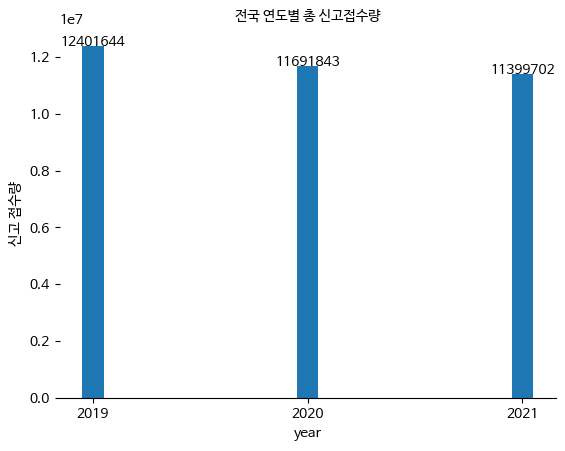

In [ ]:
year_report = [arr['RPRT_CASCNT_WHOL'].sum() for arr in div_year]

plt.rc('font', family='NanumBarunGothic')
plt.bar(year, [arr['RPRT_CASCNT_WHOL'].sum() for arr in div_year],
        align='center', width = 0.1, linewidth=5, tick_label=year)

for i, v in enumerate(year):
  plt.text(v, year_report[i], year_report[i], horizontalalignment = 'center')

plt.rc('font', family='NanumBarunGothic')
plt.title('전국 연도별 총 신고접수량', fontsize = 10)
plt.xlabel('year', fontsize = 10)
plt.ylabel('신고 접수량', fontsize = 10)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

# plt.plot(year, year_report, color='b',linestyle='--', marker='o') ## 선 그래프 출력

plt.show()

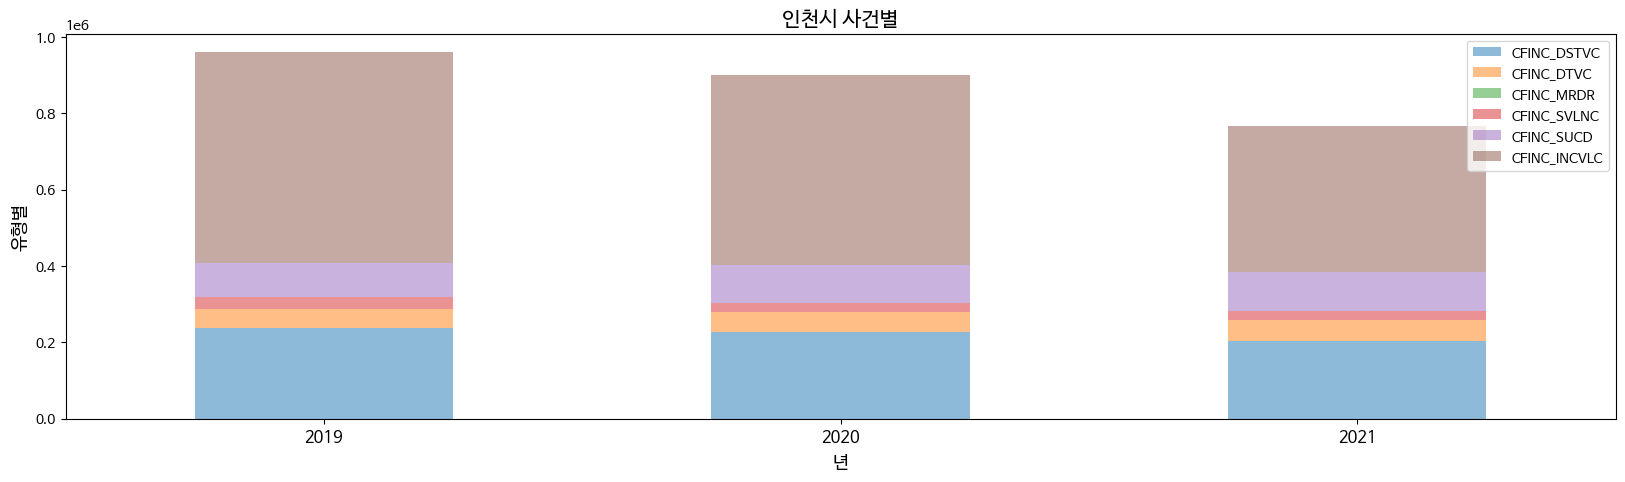

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stack_df = df.groupby('Year')[['CFINC_DSTVC', 'CFINC_DTVC', 'CFINC_MRDR', 'CFINC_SVLNC', 'CFINC_SUCD', 'CFINC_INCVLC']].sum()
stack_df = stack_df.reset_index()
stack_df.plot.bar(x = 'Year', alpha = 0.5, stacked = True, figsize = (20, 5))
plt.title('인천시 사건별', fontsize = 15)
plt.xlabel('년', fontsize = 13)
plt.ylabel('유형별', fontsize = 13)
plt.xticks(fontsize = 12, rotation = 0)
plt.show()

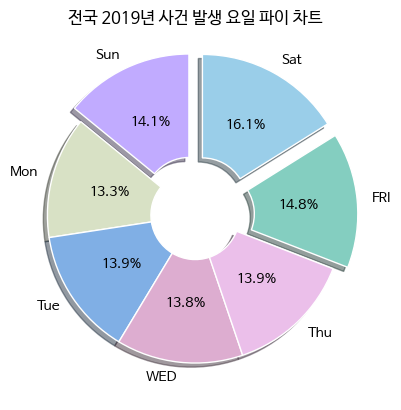

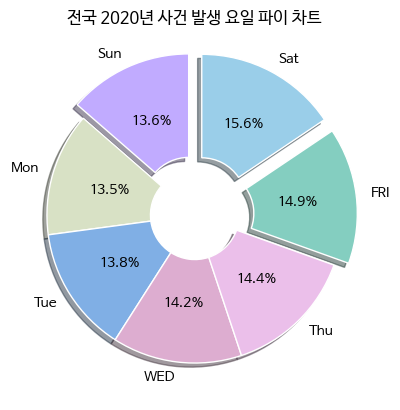

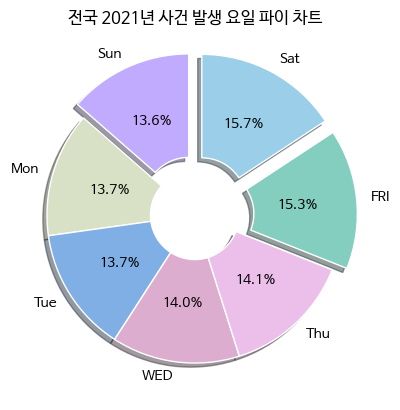

In [ ]:
def draw_pieplot(year_df, year):
  colors = ['#c1abff', '#d8e1c5', '#80afe5', '#ddadd0', '#ebbfea',
            '#84cec0', '#9acee9', '#d6c2b6', '#d48c9d', '#dcf6c5']
  ratio = [year_df[i].sum()/year_df['RPRT_CASCNT_WHOL'].sum() for i in week]
  labels = ['Sun', 'Mon', 'Tue', 'WED', 'Thu', 'FRI', 'Sat']
  explode = [0.1, 0, 0, 0, 0, 0.1,  0.1]
  wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

  plt.title('전국 {0}년 사건 발생 요일 파이 차트'.format(year))
  plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle=90,
          colors=colors, explode = explode, shadow = True, wedgeprops=wedgeprops)

  plt.show()
  print('\n'*3)
  return

for j in range(3):
  draw_pieplot(div_year[j], year[j])
# plt.savefig('./images/my_pie_chart.png')

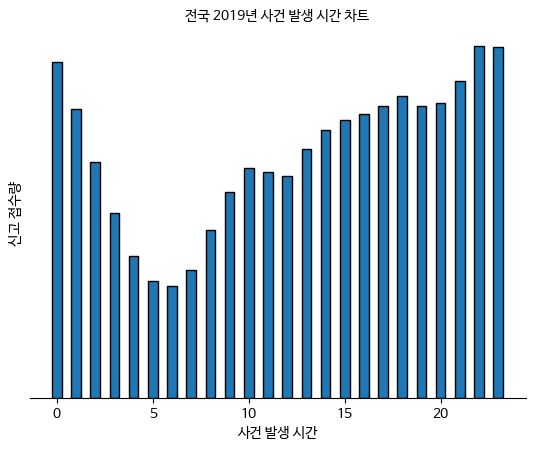

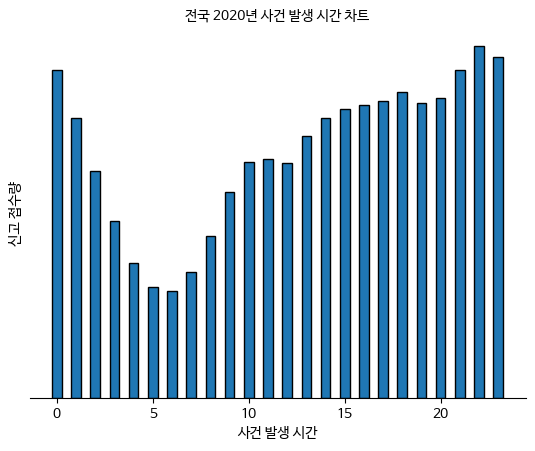

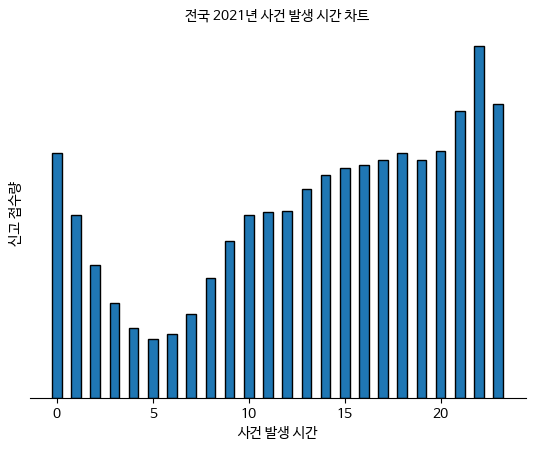

In [ ]:
def draw_barplot(year_df, year):
  report_cnt = [year_df[x].sum() for x in hours]
  plt.bar(time, report_cnt, width = 0.5, edgecolor='black')

  plt.title(f'전국 {year}년 사건 발생 시간 차트', fontsize = 10)
  plt.xlabel('사건 발생 시간', fontsize = 10)
  plt.ylabel('신고 접수량', fontsize = 10)
  plt.yticks(ticks= [])

  plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
  plt.gca().spines['top'].set_visible(False) #위 테두리 제거
  plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

  plt.show()
  print('\n'*3)
  return

for j in range(3):
  draw_barplot(div_year[j], year[j])

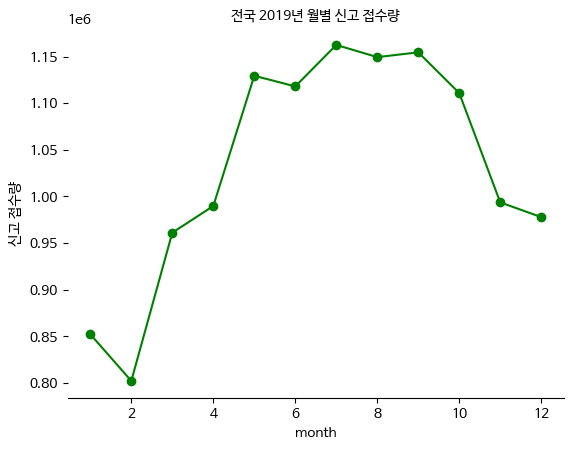

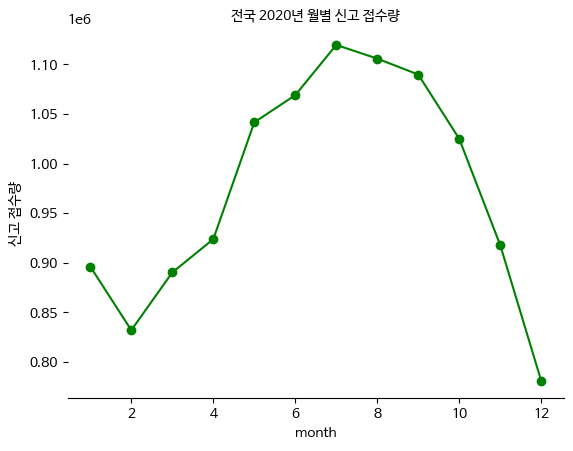

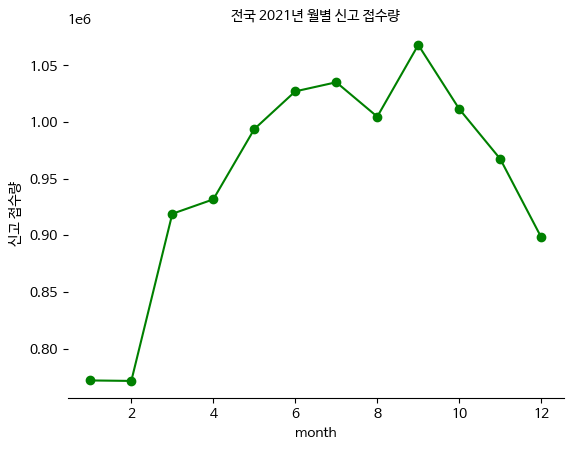

In [ ]:
def draw_piplot(year_df, year):
  report_sum = [year_df[year_df['Month'] == x]['RPRT_CASCNT_WHOL'].sum() for x in month]

  plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
  plt.gca().spines['top'].set_visible(False) #위 테두리 제거
  plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

  plt.plot(month, report_sum, marker='o', color = 'g')
  plt.title(f'전국 {year}년 월별 신고 접수량', fontsize = 10)
  plt.xlabel('month', fontsize = 10)
  plt.ylabel('신고 접수량', fontsize = 10)
  plt.show()

  print('\n'*3)
  return


for j in range(3):
  draw_piplot(div_year[j], year[j])

### Data description analysis

In [ ]:
# 인천 경찰관서 필터링
incheon_df = df[df['PLCST_NM'].str.contains('인천')]

In [ ]:
incheon_df.shape

(418, 52)

In [ ]:
incheon_df.describe()

RPRT_CASCNT_WHOL  RPRT_SEX_MALE  RPRT_SEX_FMLE  RPRT_SEX_UNKWN  \
count        418.000000     418.000000     418.000000      418.000000   
mean        5463.574163    2980.174641    1651.631579      829.928230   
std         3275.465004    1844.523548    1016.036541      501.052197   
min           67.000000      48.000000      14.000000        5.000000   
25%         3952.000000    2136.500000    1186.750000      551.500000   
50%         5557.000000    2969.000000    1669.500000      791.500000   
75%         6942.750000    3814.000000    2128.500000     1143.750000   
max        13114.000000    7560.000000    4076.000000     2127.000000   

       RPRT_SEX_ETC  ACPT_EMERG_TYPE_EMERG  ACPT_EMERG_TYPE_IMPRTNC  \
count    418.000000             418.000000               418.000000   
mean       1.622010              62.935407              1037.492823   
std        2.287636              61.994338               837.002119   
min        0.000000               0.000000                 2.000000   
25%        0.000000              24.000000               488.250000   
50%        0.000000              37.500000               802.000000   
75%        3.000000              88.500000              1514.500000   
max       10.000000             325.000000              4005.000000   

       ACPT_EMERG_TYPE_GNRL  ACPT_EMERG_TYPE_CVAPP  ACPT_EMERG_TYPE_ETC  ...  \
count            418.000000             418.000000           418.000000  ...   
mean            3333.913876             399.504785           629.727273  ...   
std             2143.308462             289.154148           382.753212  ...   
min               21.000000               0.000000             0.000000  ...   
25%             2074.250000             176.250000           447.500000  ...   
50%             3347.000000             368.000000           627.500000  ...   
75%             4467.500000             564.000000           821.000000  ...   
max             9183.000000            1364.000000          2037.000000  ...   

       OCRN_TIZN_23  CFINC_DSTVC  CFINC_DTVC  CFINC_MRDR  CFINC_SVLNC  \
count    418.000000   418.000000  418.000000  418.000000   418.000000   
mean     331.495215   129.483254   41.016746    0.234450    16.119617   
std      212.363035    89.272766   33.032390    0.551918    12.609047   
min        0.000000     0.000000    0.000000    0.000000     0.000000   
25%      199.250000    81.000000   17.250000    0.000000     5.000000   
50%      335.500000   130.000000   36.000000    0.000000    15.000000   
75%      461.750000   166.000000   60.500000    0.000000    23.000000   
max      873.000000   364.000000  167.000000    3.000000    67.000000   

       CFINC_SUCD  CFINC_INCVLC     CFINC_ETC         Year       Month  
count  418.000000    418.000000    418.000000   418.000000  418.000000  
mean    49.007177    219.169856   5112.253589  2019.968900    6.497608  
std     29.318109    147.642570   3110.194722     0.811482    3.458038  
min      0.000000      0.000000     67.000000  2019.000000    1.000000  
25%     30.000000    125.750000   3613.000000  2019.000000    3.250000  
50%     46.500000    222.000000   5130.000000  2020.000000    6.500000  
75%     65.750000    312.750000   6595.250000  2021.000000    9.000000  
max    184.000000    776.000000  16546.000000  2021.000000   12.000000  

[8 rows x 50 columns]

In [ ]:
incheon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 202 to 9801
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ACPT_YM                  418 non-null    datetime64[ns]
 1   PLCST_NM                 418 non-null    object        
 2   RPRT_CASCNT_WHOL         418 non-null    int64         
 3   RPRT_SEX_MALE            418 non-null    int64         
 4   RPRT_SEX_FMLE            418 non-null    int64         
 5   RPRT_SEX_UNKWN           418 non-null    int64         
 6   RPRT_SEX_ETC             418 non-null    int64         
 7   ACPT_EMERG_TYPE_EMERG    418 non-null    int64         
 8   ACPT_EMERG_TYPE_IMPRTNC  418 non-null    int64         
 9   ACPT_EMERG_TYPE_GNRL     418 non-null    int64         
 10  ACPT_EMERG_TYPE_CVAPP    418 non-null    int64         
 11  ACPT_EMERG_TYPE_ETC      418 non-null    int64         
 12  OCRN_DOTW_SNDD           418 non-

In [ ]:
incheon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 202 to 9801
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ACPT_YM                  418 non-null    datetime64[ns]
 1   PLCST_NM                 418 non-null    object        
 2   RPRT_CASCNT_WHOL         418 non-null    int64         
 3   RPRT_SEX_MALE            418 non-null    int64         
 4   RPRT_SEX_FMLE            418 non-null    int64         
 5   RPRT_SEX_UNKWN           418 non-null    int64         
 6   RPRT_SEX_ETC             418 non-null    int64         
 7   ACPT_EMERG_TYPE_EMERG    418 non-null    int64         
 8   ACPT_EMERG_TYPE_IMPRTNC  418 non-null    int64         
 9   ACPT_EMERG_TYPE_GNRL     418 non-null    int64         
 10  ACPT_EMERG_TYPE_CVAPP    418 non-null    int64         
 11  ACPT_EMERG_TYPE_ETC      418 non-null    int64         
 12  OCRN_DOTW_SNDD           418 non-

In [ ]:
# 인천 데이터 연도별 분리
df_19 = incheon_df[incheon_df['Year'] == 2019]
df_20 = incheon_df[incheon_df['Year'] == 2020]
df_21 = incheon_df[incheon_df['Year'] == 2021]

# 반복문 활용 시
div_year = [df_19, df_20, df_21]

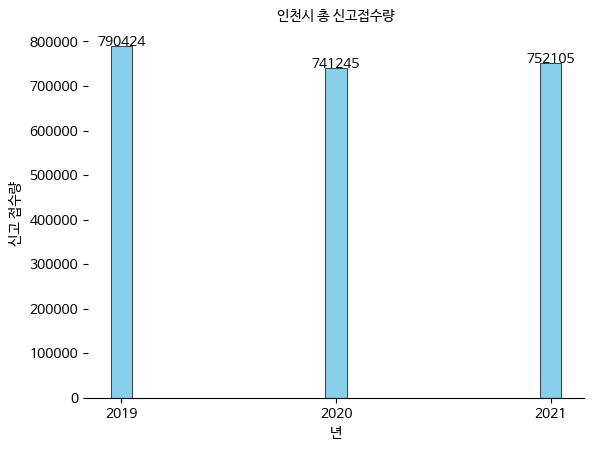

In [ ]:
year_report = [arr['RPRT_CASCNT_WHOL'].sum() for arr in div_year]

plt.rc('font', family='NanumBarunGothic')
plt.bar(year, [arr['RPRT_CASCNT_WHOL'].sum() for arr in div_year],
        align='center', width = 0.1, linewidth=0.5, tick_label=year, color = 'skyblue', edgecolor = 'black')

for i, v in enumerate(year):
  plt.text(v, year_report[i], year_report[i], horizontalalignment = 'center')

plt.rc('font', family='NanumBarunGothic')
plt.title('인천시 총 신고접수량', fontsize = 10)
plt.xlabel('년', fontsize = 10)
plt.ylabel('신고 접수량', fontsize = 10)

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

# plt.plot(year, year_report, color='b',linestyle='--', marker='o') ## 선 그래프 출력

plt.show()

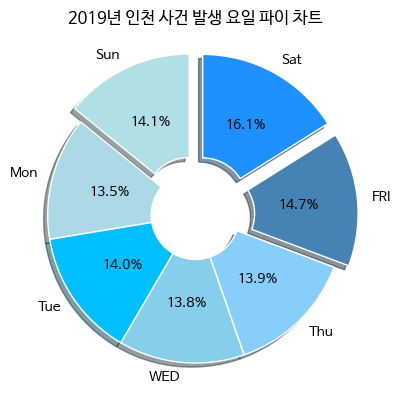

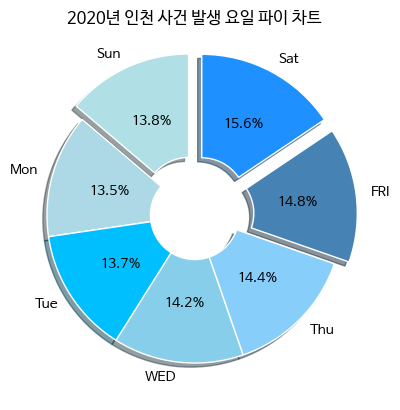

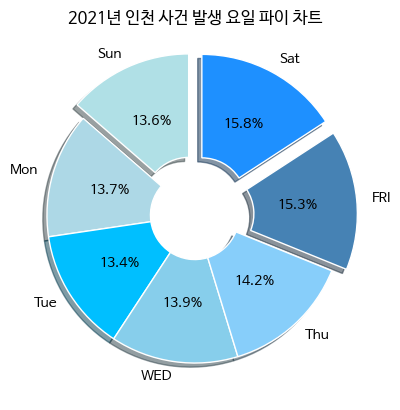

In [ ]:
def draw_pieplot(year_df, year):
  colors = ['powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'dodgerblue']
  ratio = [year_df[i].sum()/year_df['RPRT_CASCNT_WHOL'].sum() for i in week]
  labels = ['Sun', 'Mon', 'Tue', 'WED', 'Thu', 'FRI', 'Sat']
  explode = [0.1, 0, 0, 0, 0, 0.1,  0.1]
  wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

  plt.title('{0}년 인천 사건 발생 요일 파이 차트'.format(year))
  plt.pie(ratio, labels = labels, autopct = '%.1f%%', startangle=90,
          colors=colors, explode = explode, shadow = True, wedgeprops=wedgeprops)

  plt.show()
  print('\n'*3)
  return

for j in range(3):
  draw_pieplot(div_year[j], year[j])
# plt.savefig('./images/my_pie_chart.png')

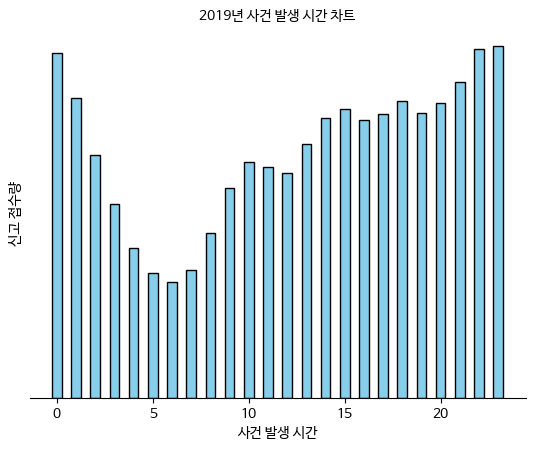

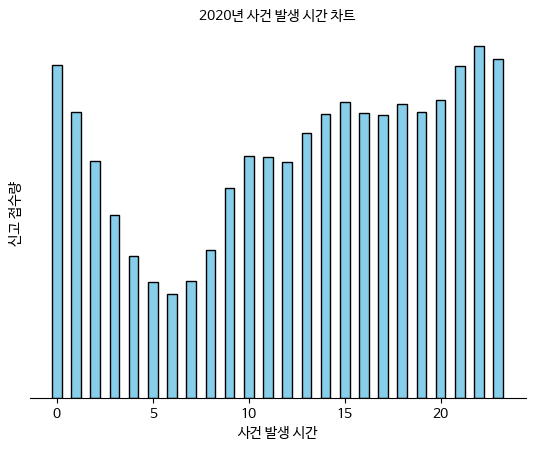

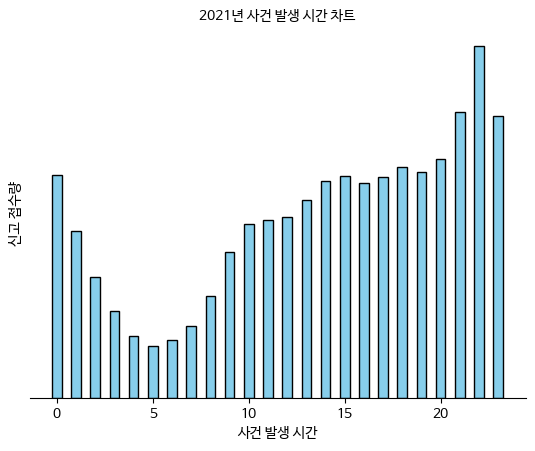

In [ ]:
def draw_barplot(year_df, year):
  report_cnt = [year_df[x].sum() for x in hours]
  plt.bar(time, report_cnt, width = 0.5, color = 'skyblue', edgecolor='black')

  plt.title(f'{year}년 사건 발생 시간 차트', fontsize = 10)
  plt.xlabel('사건 발생 시간', fontsize = 10)
  plt.ylabel('신고 접수량', fontsize = 10)
  plt.yticks(ticks= [])

  plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
  plt.gca().spines['top'].set_visible(False) #위 테두리 제거
  plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

  plt.show()
  print('\n'*3)
  return

for j in range(3):
  draw_barplot(div_year[j], year[j])

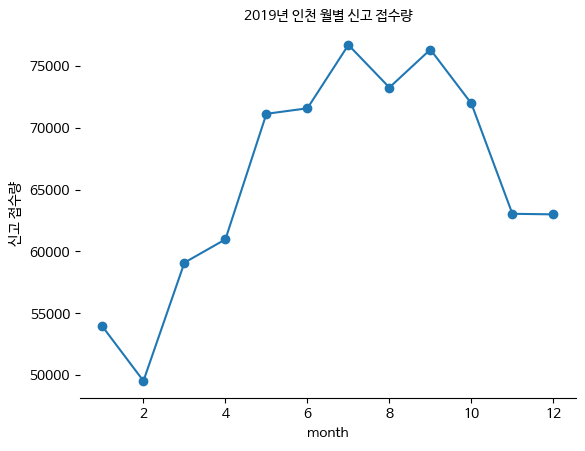

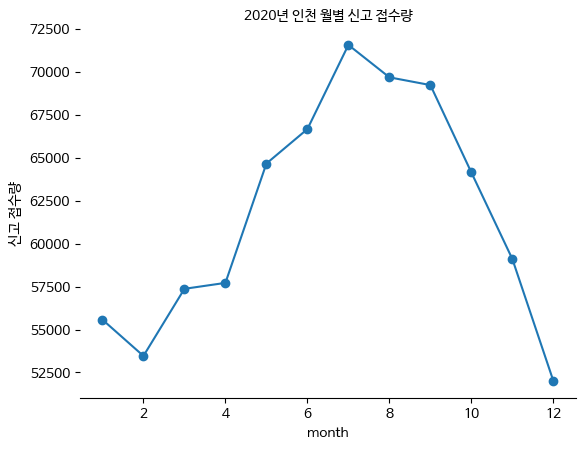

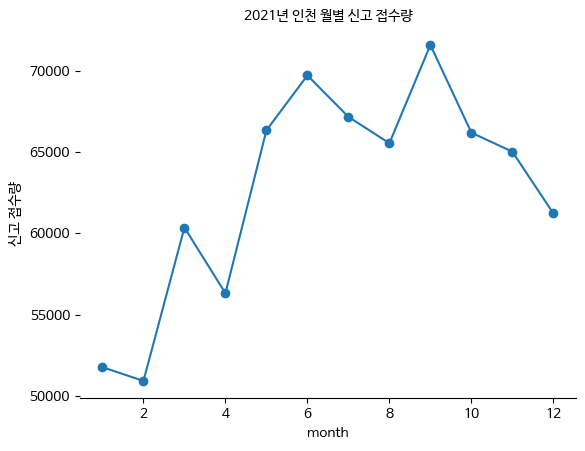

In [ ]:
def draw_piplot(year_df, year):
  report_sum = [year_df[year_df['Month'] == x]['RPRT_CASCNT_WHOL'].sum() for x in month]

  plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
  plt.gca().spines['top'].set_visible(False) #위 테두리 제거
  plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

  plt.plot(month, report_sum, marker='o')
  plt.title(f'{year}년 인천 월별 신고 접수량', fontsize = 10)
  plt.xlabel('month', fontsize = 10)
  plt.ylabel('신고 접수량', fontsize = 10)
  plt.show()

  print('\n'*3)
  return


for j in range(3):
  draw_piplot(div_year[j], year[j])

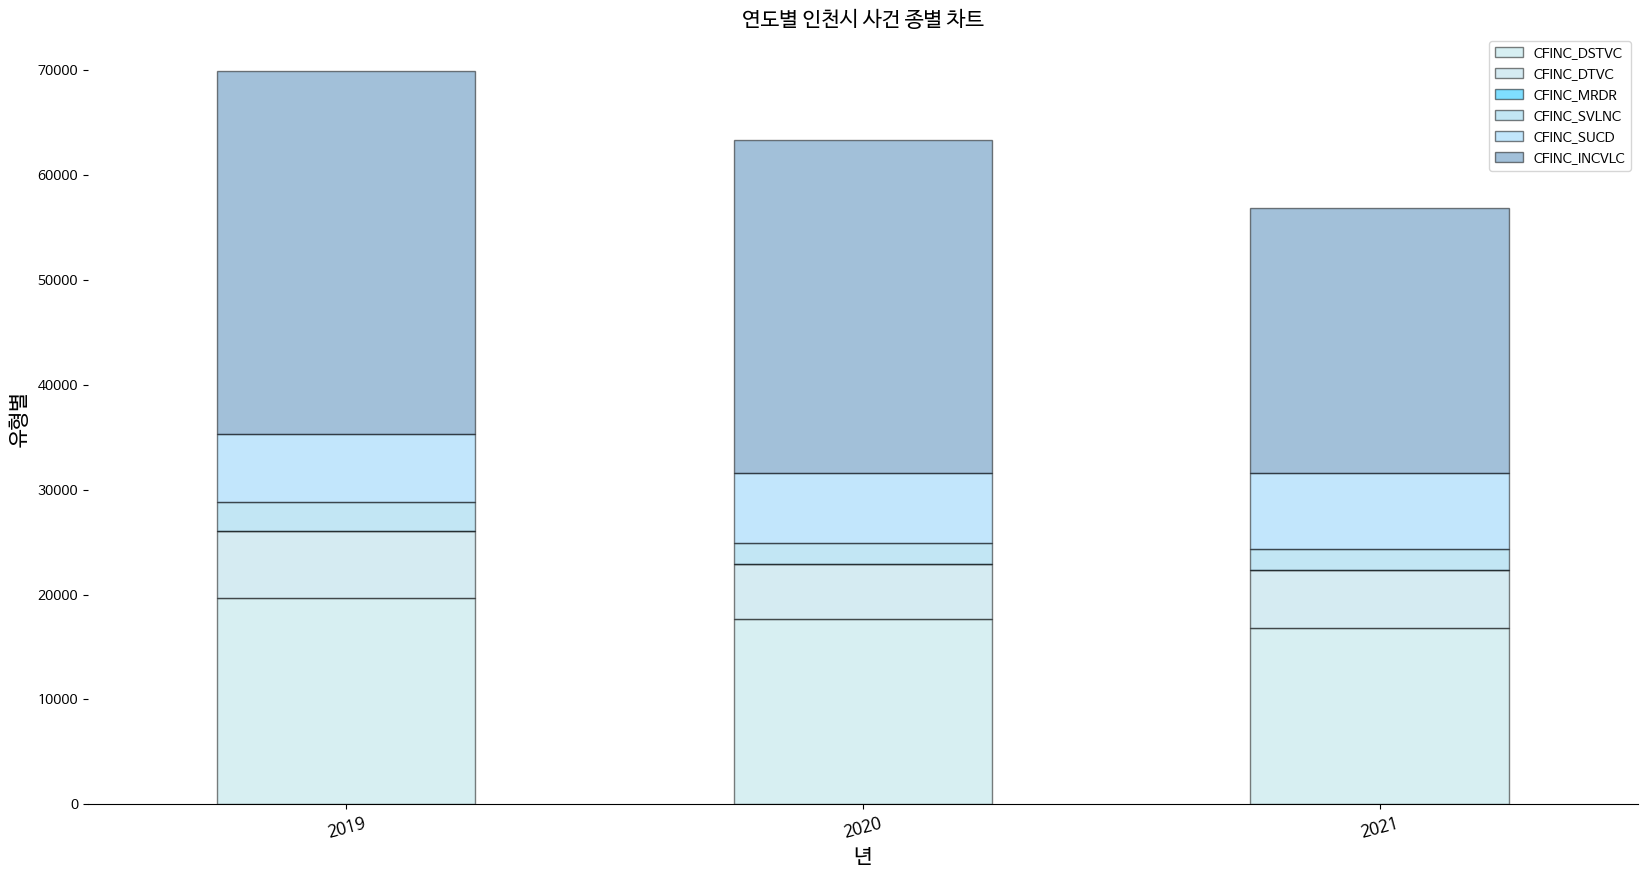

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

stack_df = incheon_df.groupby('Year')[['CFINC_DSTVC', 'CFINC_DTVC', 'CFINC_MRDR', 'CFINC_SVLNC', 'CFINC_SUCD', 'CFINC_INCVLC']].sum()
stack_df = stack_df.reset_index()
colors = ['powderblue', 'lightblue', 'deepskyblue', 'skyblue', 'lightskyblue', 'steelblue', 'dodgerblue']

ax = stack_df.plot.bar(x = 'Year', alpha = 0.5, stacked = True, figsize = (20, 10), color = colors, edgecolor='black')

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.title('연도별 인천시 사건 종별 차트', fontsize = 15)
plt.xlabel('년', fontsize = 15)
plt.ylabel('유형별', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 15)
plt.show()

In [ ]:
# 위의 그래프 비율
x_df = stack_df.drop(['Year'], axis = 'columns')
x_df = x_df.div(x_df[['CFINC_DSTVC', 'CFINC_DTVC', 'CFINC_MRDR', 'CFINC_SVLNC', 'CFINC_SUCD', 'CFINC_INCVLC']].sum(axis = 1),axis = 0)
x_df.round(2)

CFINC_DSTVC  CFINC_DTVC  CFINC_MRDR  CFINC_SVLNC  CFINC_SUCD  CFINC_INCVLC
0         0.28        0.09         0.0         0.04        0.09          0.49
1         0.28        0.08         0.0         0.03        0.11          0.50
2         0.30        0.10         0.0         0.04        0.13          0.44

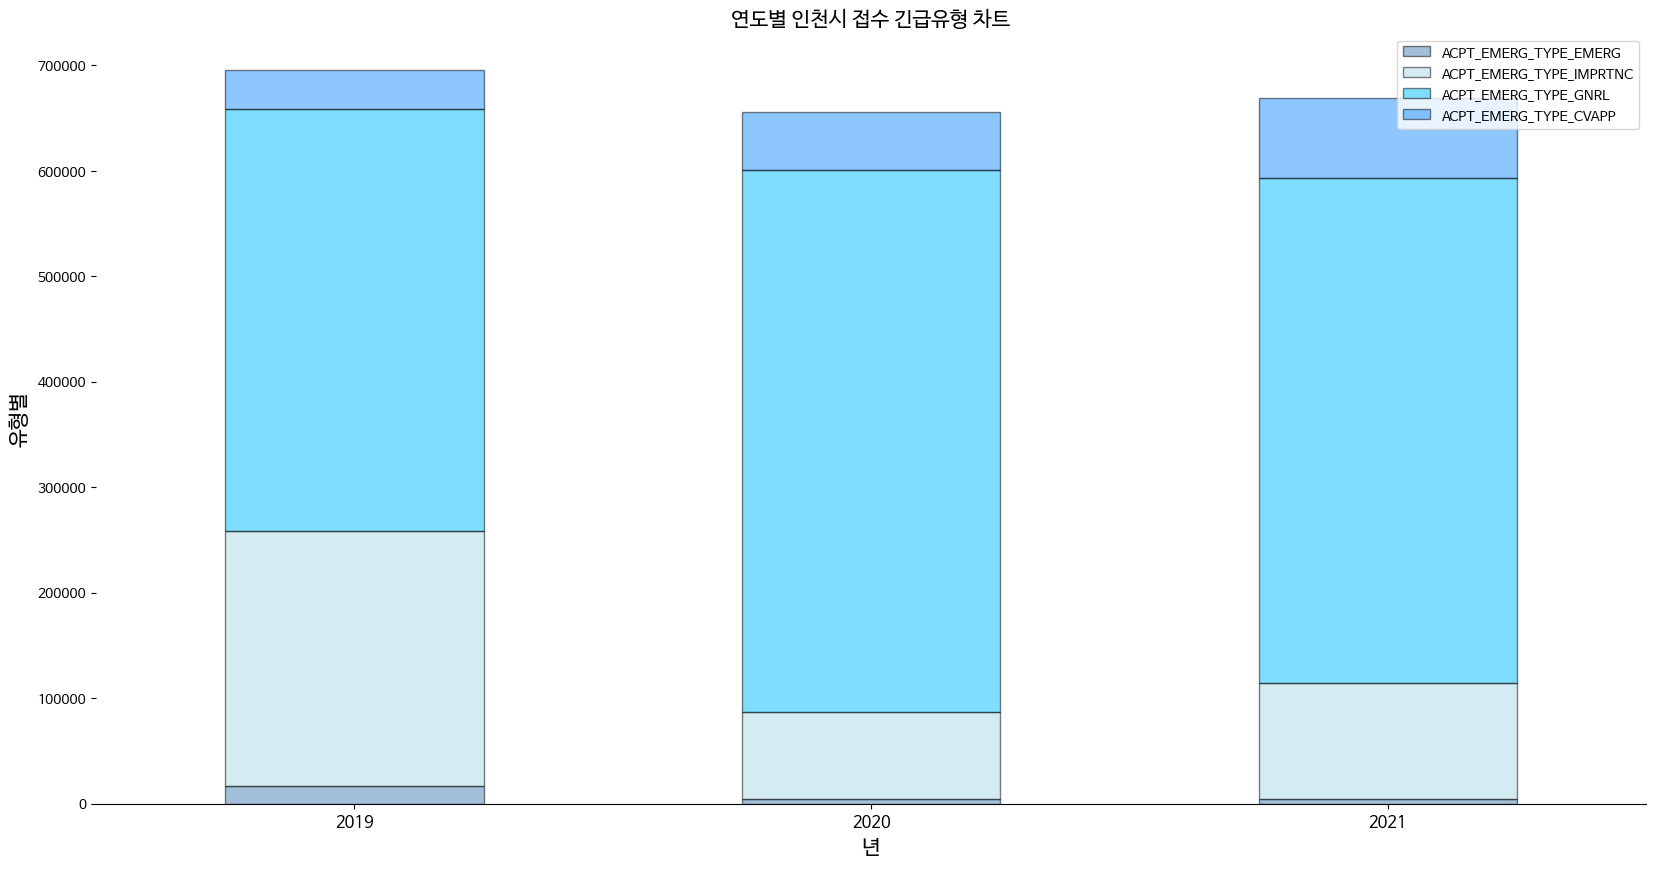

In [ ]:
stacked = incheon_df.groupby('Year')[['ACPT_EMERG_TYPE_EMERG', 'ACPT_EMERG_TYPE_IMPRTNC', 'ACPT_EMERG_TYPE_GNRL', 'ACPT_EMERG_TYPE_CVAPP']].sum()
stacked = stacked.reset_index()
colors = ['steelblue', 'lightblue', 'deepskyblue', 'dodgerblue']

stacked.plot.bar(x = 'Year', alpha = 0.5, stacked = True, figsize = (20, 10), color = colors, edgecolor='black')

plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거

plt.title('연도별 인천시 접수 긴급유형 차트', fontsize = 15)
plt.xlabel('년', fontsize = 15)
plt.ylabel('유형별', fontsize = 15)
plt.xticks(fontsize = 12, rotation = 0)
plt.show()

In [ ]:
# 위의 그래프 비율
x_df = stacked.drop(['Year'], axis = 'columns')
x_df = x_df.div(x_df[['ACPT_EMERG_TYPE_EMERG', 'ACPT_EMERG_TYPE_IMPRTNC', 'ACPT_EMERG_TYPE_GNRL', 'ACPT_EMERG_TYPE_CVAPP']].sum(axis = 1),axis = 0)
x_df.round(2)

ACPT_EMERG_TYPE_EMERG  ACPT_EMERG_TYPE_IMPRTNC  ACPT_EMERG_TYPE_GNRL  \
0                   0.02                     0.35                  0.58   
1                   0.01                     0.13                  0.78   
2                   0.01                     0.16                  0.72   

   ACPT_EMERG_TYPE_CVAPP  
0                   0.05  
1                   0.08  
2                   0.11

### Time series analysis

In [ ]:
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt

from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime

from scalecast.Forecaster import Forecaster
import matplotlib.pyplot as plt
import pandas_datareader as pdr

%matplotlib inline

# # To change scientific numbers to float
# np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# # Increases the size of sns plots
# sns.set(rc={'figure.figsize':(8,6)})

import itertools
import warnings

import datetime
from datetime import datetime
warnings.filterwarnings('ignore')


import os
import numpy as np
import pandas as pd
from pandas import to_datetime
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import warnings
import datetime
from datetime import datetime
warnings.filterwarnings('ignore')

%matplotlib inline

# ARIMA 모델 패키지
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# Auto Arima 모델 패키지
# pip install --user pmdarima
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
!pip install SCALECAST

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
total_incheon = incheon_df.groupby(['ACPT_YM'])['RPRT_CASCNT_WHOL'].agg(**{'report_cnt':'sum'}).reset_index()
total_incheon

ACPT_YM  report_cnt
0  2019-01-01       53937
1  2019-02-01       49541
2  2019-03-01       59094
3  2019-04-01       60976
4  2019-05-01       71114
5  2019-06-01       71560
6  2019-07-01       76678
7  2019-08-01       73237
8  2019-09-01       76307
9  2019-10-01       71948
10 2019-11-01       63039
11 2019-12-01       62993
12 2020-01-01       55575
13 2020-02-01       53462
14 2020-03-01       57372
15 2020-04-01       57718
16 2020-05-01       64669
17 2020-06-01       66677
18 2020-07-01       71579
19 2020-08-01       69691
20 2020-09-01       69240
21 2020-10-01       64148
22 2020-11-01       59107
23 2020-12-01       52007
24 2021-01-01       51759
25 2021-02-01       50914
26 2021-03-01       60353
27 2021-04-01       56309
28 2021-05-01       66334
29 2021-06-01       69713
30 2021-07-01       67165
31 2021-08-01       65538
32 2021-09-01       71589
33 2021-10-01       66191
34 2021-11-01       65019
35 2021-12-01       61221

<Axes: xlabel='Date', ylabel='Values'>

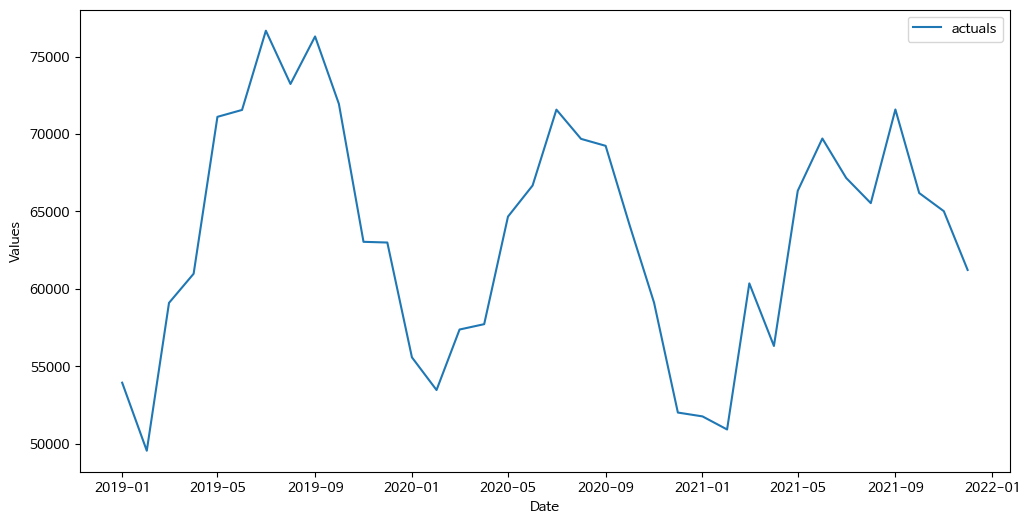

In [ ]:
f = Forecaster(y=total_incheon['report_cnt'], current_dates=total_incheon['ACPT_YM'])
f.plot()

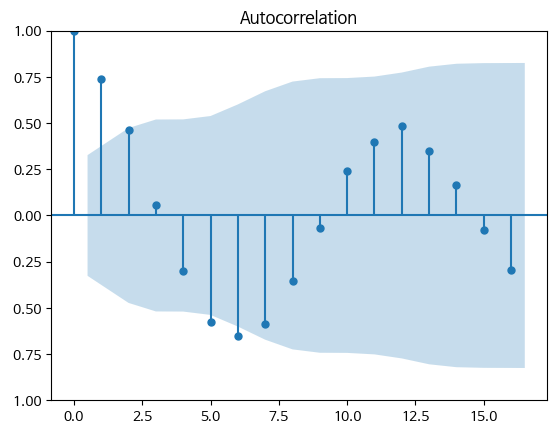

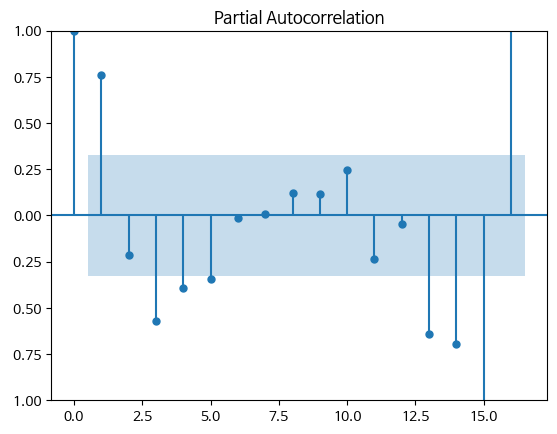

In [ ]:
f.plot_acf()
f.plot_pacf()
plt.show()

In [ ]:
# train 데이터와 validation 데이터 나누기.
X_train = total_incheon[total_incheon['ACPT_YM'] < '2021-07']
X_valid = total_incheon[total_incheon['ACPT_YM'] >= '2021-06']

# 예측한 열만 필터링하기
nyc = X_train[['ACPT_YM', 'report_cnt']]
nyc_v = X_valid[['ACPT_YM', 'report_cnt']]

# 각 데이터의 사이즈 확인하기
print('X_train Shape', X_train.shape)
print('X_Valid Shape', X_valid.shape)

# Date 를 dataframe의 인덱스로 만들어주기
nyc.set_index('ACPT_YM', inplace=True)
nyc_v.set_index('ACPT_YM', inplace=True)

X_train Shape (30, 2)
X_Valid Shape (7, 2)


In [ ]:
# 예측할 달
index_6_month = pd.date_range(nyc_v.index[-1], freq='M', periods = 6, tz = None)

In [ ]:
index_6_month

DatetimeIndex(['2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31',
               '2022-04-30', '2022-05-31'],
              dtype='datetime64[ns]', freq='M')

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=330.559, Time=0.11 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=325.764, Time=0.43 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=327.445, Time=0.93 sec
 ARIMA(0,1,0)(0,1,3)[12]             : AIC=329.186, Time=1.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=324.497, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=327.751, Time=0.61 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=329.445, Time=0.68 sec
 ARIMA(0,1,0)(1,1,3)[12]             : AIC=331.186, Time=1.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=328.105, Time=0.29 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=329.749, Time=0.51 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=331.444, Time=0.42 sec
 ARIMA(0,1,0)(2,1,3)[12]             : AIC=333.186, Time=0.60 sec
 ARIMA(0,1,0)(3,1,0)[12]             : AIC=330.105, Time=0.33 sec
 ARIMA(0,1,0)(3,1,1)[12]             : AIC=331.749, Time=0.42 sec
 ARIMA(0,1,0)(3,1,2)[12]             : AIC=333.444, Time=0.63 sec
 ARIMA(0,1

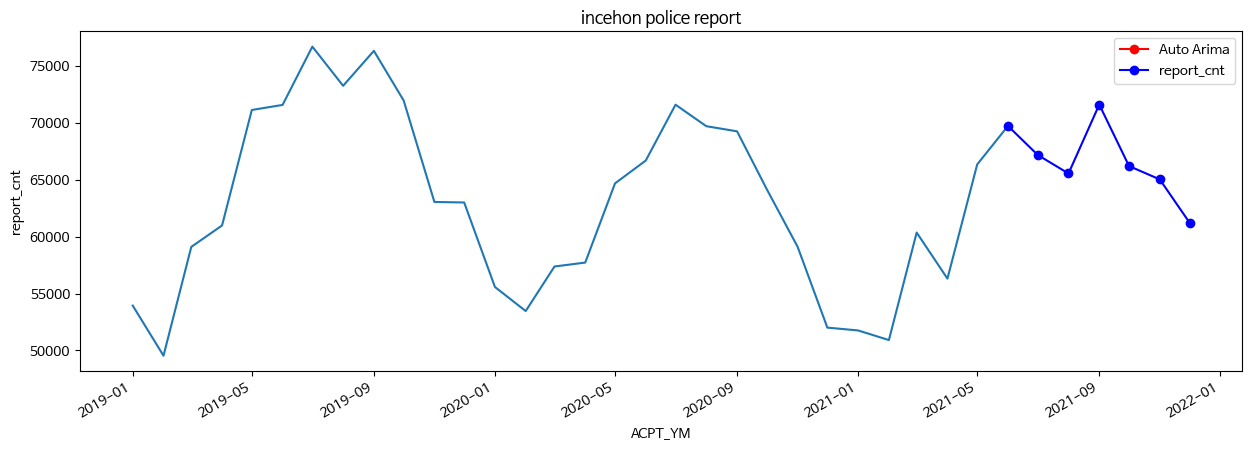

In [ ]:
# Auto-ARIMA 돌리기 - 계측값이 일별이면 m=1, 월별이면 m=12, 주별이면 m=52,
# 계절성이 있는 데이터면 seasonal=True 로 바꿔야함. 알아서 d 값을 찾아줌.
auto_arima_model = pm.auto_arima(nyc, max_p=3, max_q=3, d=1,
                   seasonal=True, max_P=3, max_Q=3, D=1, m=12,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False
                  )
# 모델 예측
fcast2 = auto_arima_model.predict(6)
fcast2 = pd.Series(fcast2, index=index_6_month)
fcast2 = fcast2.rename("Auto Arima")




# 예측값 시각화
fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='ACPT_YM', y='report_cnt', data = nyc)
chart.set_title('incehon police report')
fcast2.plot(ax=ax, color='red', marker="o", legend=True)
nyc_v.plot(ax=ax, color='blue', marker="o", legend=True)
print(nyc_v['report_cnt'].values)
print(fcast2)
# # AIC 프린트하기
# print('The MSE of auto-arima is:', mean_squared_error(nyc_v['report_cnt'].values, fcast2.values, squared=False))

### Time Series Forecasting

In [ ]:
total_incheon = incheon_df.groupby(['ACPT_YM'])['RPRT_CASCNT_WHOL'].agg(**{'report_cnt':'sum'}).reset_index()

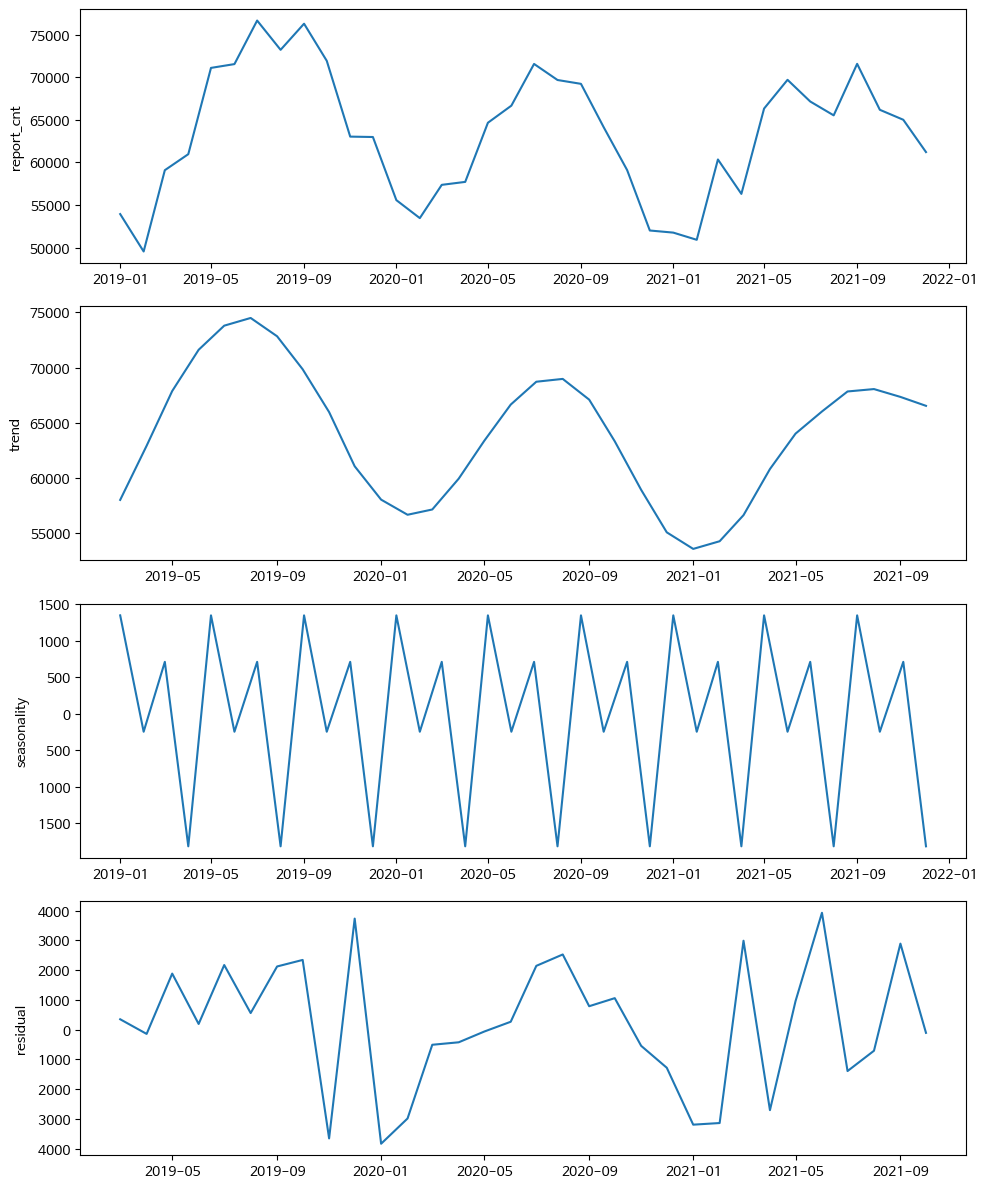

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
from matplotlib import pyplot as plt

# df = pd.read_csv("total_report_112.csv", encoding='cp949')
# incheon_df = df[df['PLCST_NM'].str.contains('인천')]
# total_incheon = incheon_df.groupby(['ACPT_YM'])['RPRT_CASCNT_WHOL'].agg(**{'report_cnt':'sum'}).reset_index()

decomposition = seasonal_decompose(total_incheon["report_cnt"], period=4, model="additive")

total_incheon["trend"] = decomposition.trend
total_incheon["seasonality"] = decomposition.seasonal
total_incheon["residual"] = decomposition.resid

titles = ["report_cnt", "trend", "seasonality", "residual"]

# 데이터 준비
dates = pd.to_datetime(total_incheon['ACPT_YM'])
report_cnt = total_incheon['report_cnt']
trend = total_incheon['trend']
seasonality = total_incheon['seasonality']
residual = total_incheon['residual']

fig, axs = plt.subplots(4, 1, figsize=(10, 12))

axs[0].plot(dates, report_cnt)
axs[0].set_ylabel('report_cnt')

axs[1].plot(dates, trend)
axs[1].set_ylabel('trend')

axs[2].plot(dates, seasonality)
axs[2].set_ylabel('seasonality')

axs[3].plot(dates, residual)
axs[3].set_ylabel('residual')


plt.tight_layout()
plt.show()

In [ ]:
total_incheon.head()

ACPT_YM  report_cnt      trend  seasonality     residual
0 2019-01-01       53937        NaN  1347.867188          NaN
1 2019-02-01       49541        NaN  -245.289062          NaN
2 2019-03-01       59094  58034.125   711.570312   348.304688
3 2019-04-01       60976  62933.625 -1814.148438  -143.476562
4 2019-05-01       71114  67884.000  1347.867188  1882.132812

In [ ]:
total_incheon.shape

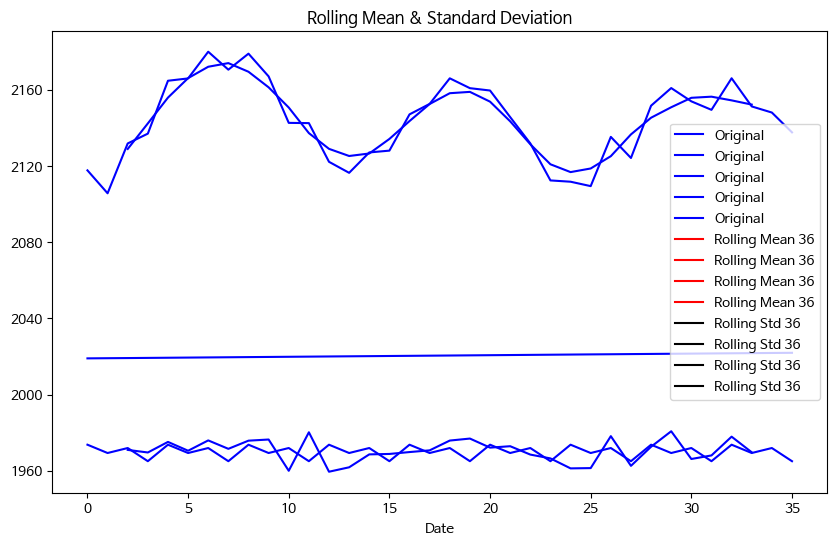

In [ ]:
def plot_rolling(data, interval):
    rolmean = data.rolling(interval).mean()
    rolstd = data.rolling(interval).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10, 6))
    plt.xlabel('Date')
    orig = plt.plot(data, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean {}'.format(interval))
    std = plt.plot(rolstd, color='black', label = 'Rolling Std {}'.format(interval))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

plot_rolling(total_incheon, 36)

In [ ]:
total_incheon = incheon_df.groupby(['ACPT_YM'])['RPRT_CASCNT_WHOL'].agg(**{'report_cnt':'sum'})

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))

print('ADF TEST 결과')
adf_test(total_incheon)

ADF TEST 결과
ADF Statistics: -5.049154
p-value: 0.000018
num of lags: 4.000000
num of observations: 31.000000
Critical values:
	1%: -3.661
	5%: -2.961
	10%: -2.619
